In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import multiprocessing as mul
from scipy import stats
import pickle
from scipy.integrate import quad
from corner import corner
import pandas as pd
import dynesty as dyn
from scipy.stats import gaussian_kde

In [2]:
ncpu = 12
grbparam = pd.read_csv(os.getcwd() + '/../data/GRBPARAM.csv', index_col=0)

param_ranges_NULL = [(1e-20, 5000), (-3, 10), (-10, 3), (0, 3), (0, 4)]
param_range_lin = [(1e-20, 1e20), (1e-20, 5000), (-3, 10), (-10, 3), (0, 3), (0, 4)]
param_range_quad = [(1e-20, 1e15), (1e-20, 5000), (-3, 10), (-10, 3), (0, 3), (0, 4)]

#### Liu et al error

$\dfrac{d\Delta t_{int}}{dE} = \Delta t_{int} \left[\alpha_1 + (\alpha_2 - \alpha_1) \left(\dfrac{E - E_0}{E_b}\right)^{\frac{1}{\mu}}  \cdot \left(\left(\frac{E-E_0}{E_\text{b}}\right)^\frac{1}{{\mu}}+1\right)^{-1}\right]$

#### L.I.V error

$\quad \dfrac{d\Delta t_{LIV}}{dE} = \dfrac{1 + n}{2H_0}\cdot\dfrac{n E^{n-1}}{E_{QG}^{n}} {\huge \int}  _{0}^{z} \quad \dfrac{\left(1+z^{\prime}\right)^{n} d z^{\prime}}{\sqrt{\Omega_{\mathrm{m}}\left(1+z^{\prime}\right)^{3}+\Omega_{\Lambda}}}$


#### Total error
$\quad \dfrac{d(\Delta t_{int} + \Delta t_{LIV})}{dE}$


2427it [00:09, 183.96it/s, bound: 7 | nc: 25 | ncall: 32841 | eff(%):  7.390 | loglstar:   -inf < -272.882 <    inf | logz: -281.082 +/-    nan | dlogz: 261.235 >  0.100]    /tmp/ipykernel_28363/3232513864.py:34: RuntimeWarning: overflow encountered in power
  return zeta * (eob**alpha1) * ((0.5 * ((1 + eob)**(1/mu))) ** ((alpha2 - alpha1) * mu))
/tmp/ipykernel_28363/3232513864.py:82: RuntimeWarning: overflow encountered in square
  err = np.sqrt((ddeltat_dE(x, Eb, alpha1, alpha2, mu, zeta) * E_err)**2 + yerr**2)
10008it [00:53, 188.03it/s, +512 | bound: 104 | nc: 1 | ncall: 224928 | eff(%):  4.688 | loglstar:   -inf < -1.469 <    inf | logz: -18.683 +/-    nan | dlogz:  0.000 >  0.100]
0it [00:00, ?it/s]/tmp/ipykernel_28363/3232513864.py:34: RuntimeWarning: overflow encountered in power
  return zeta * (eob**alpha1) * ((0.5 * ((1 + eob)**(1/mu))) ** ((alpha2 - alpha1) * mu))
372it [00:00, 1651.88it/s, bound: 0 | nc: 5 | ncall: 1043 | eff(%): 35.666 | loglstar:   -inf < -1543.488 <    

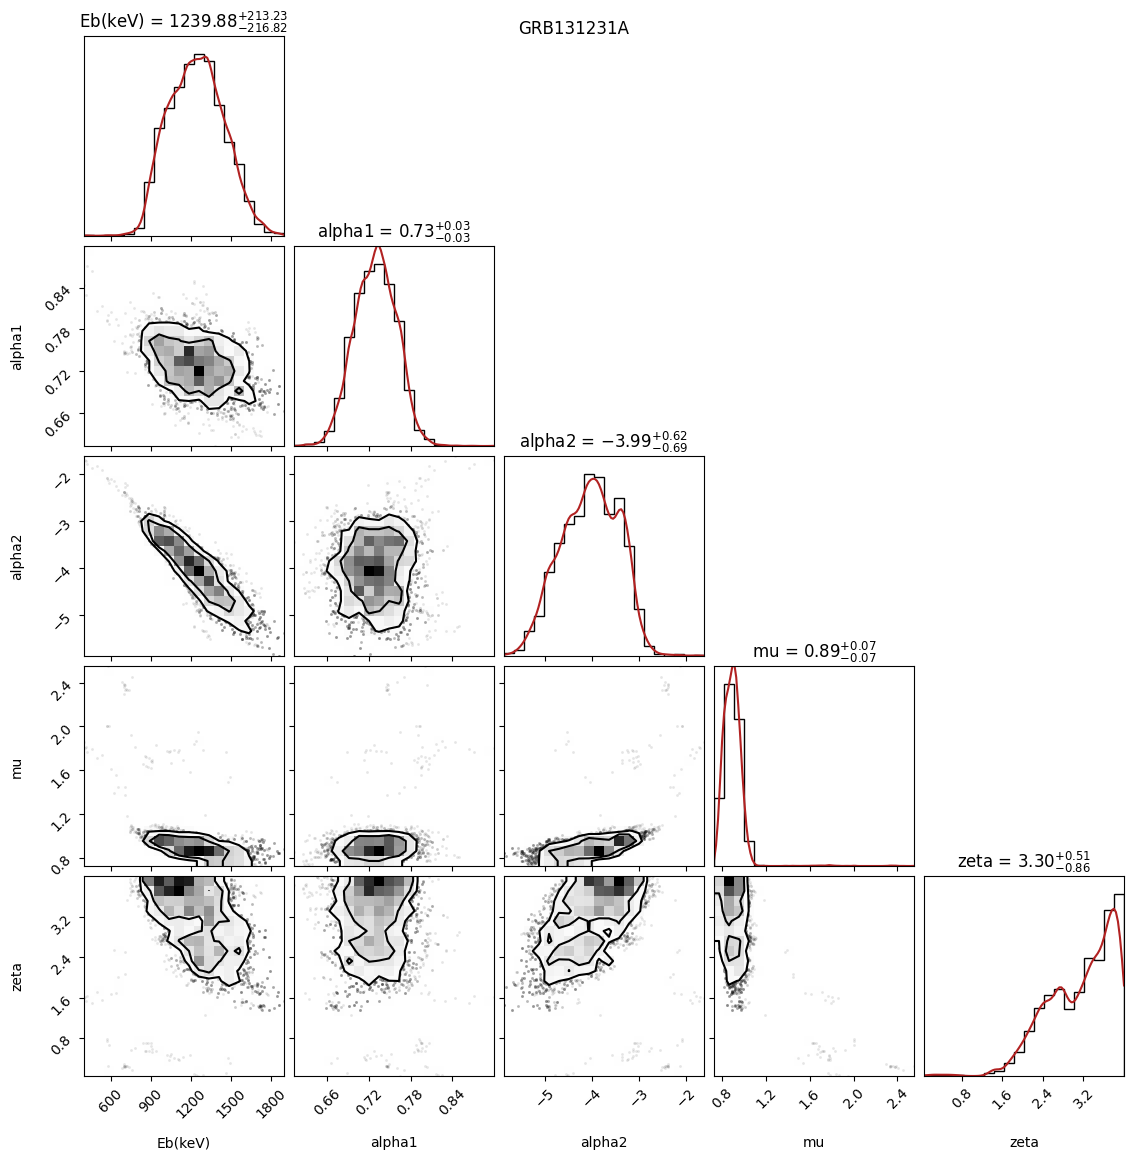

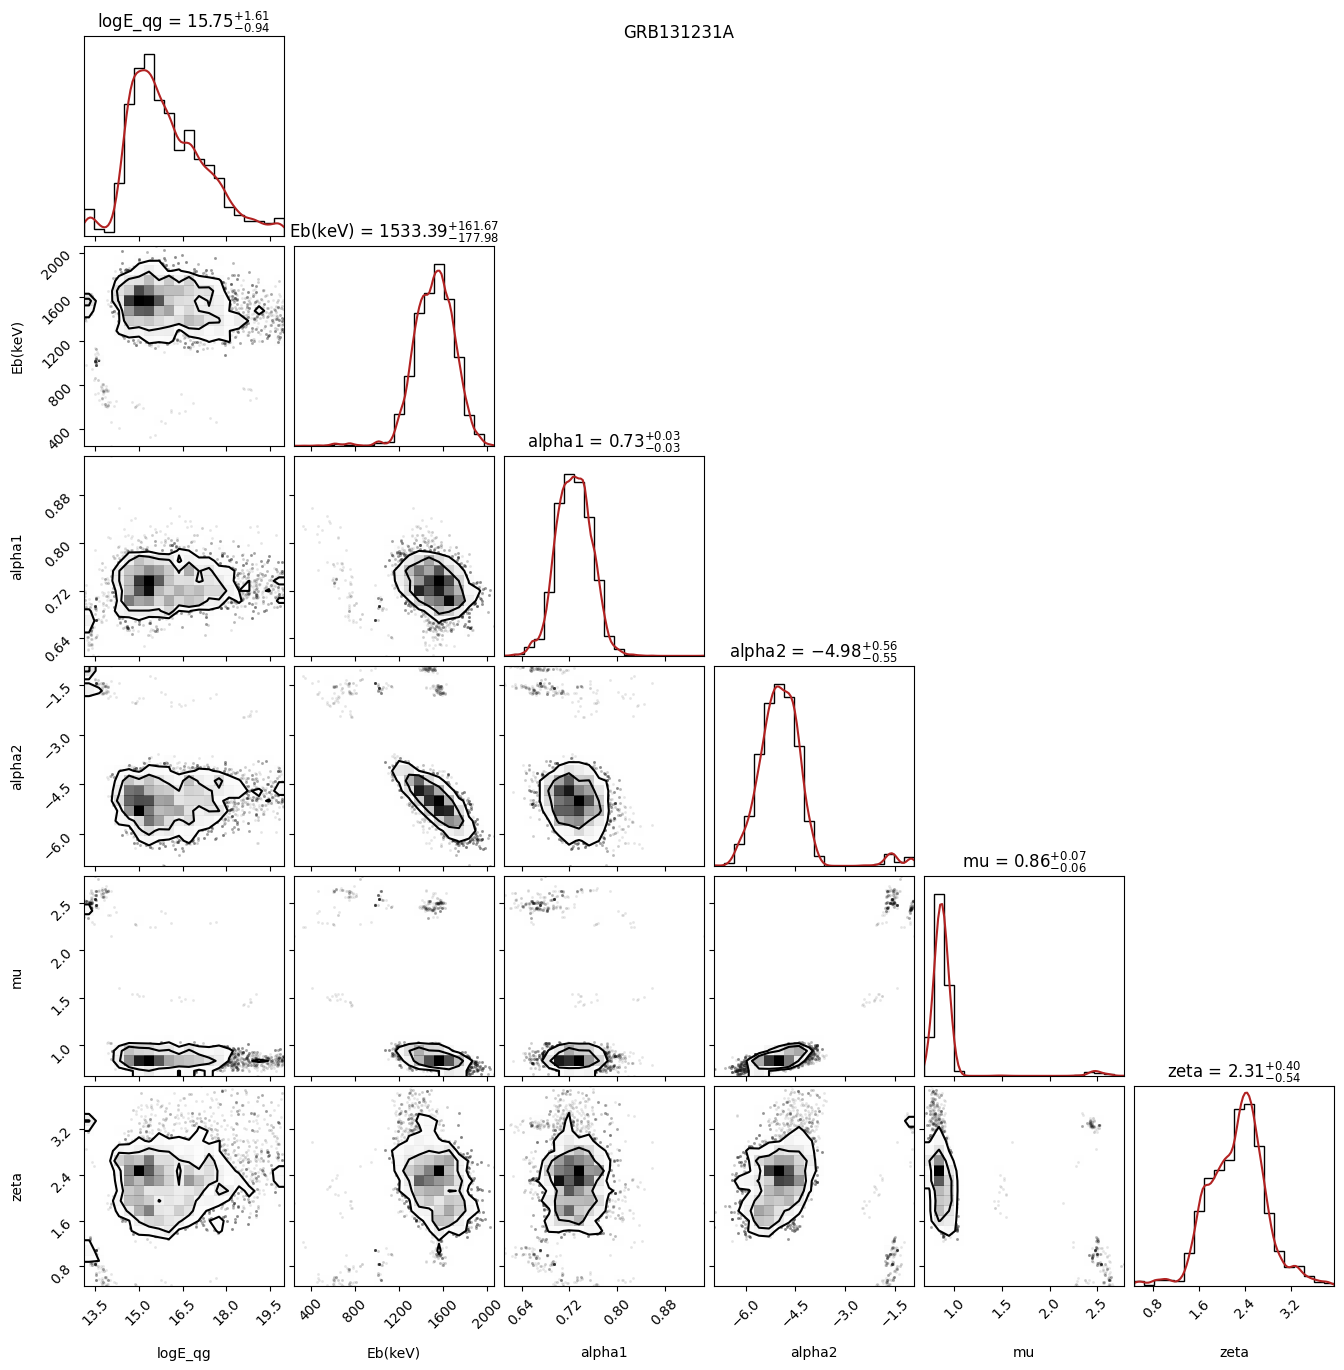

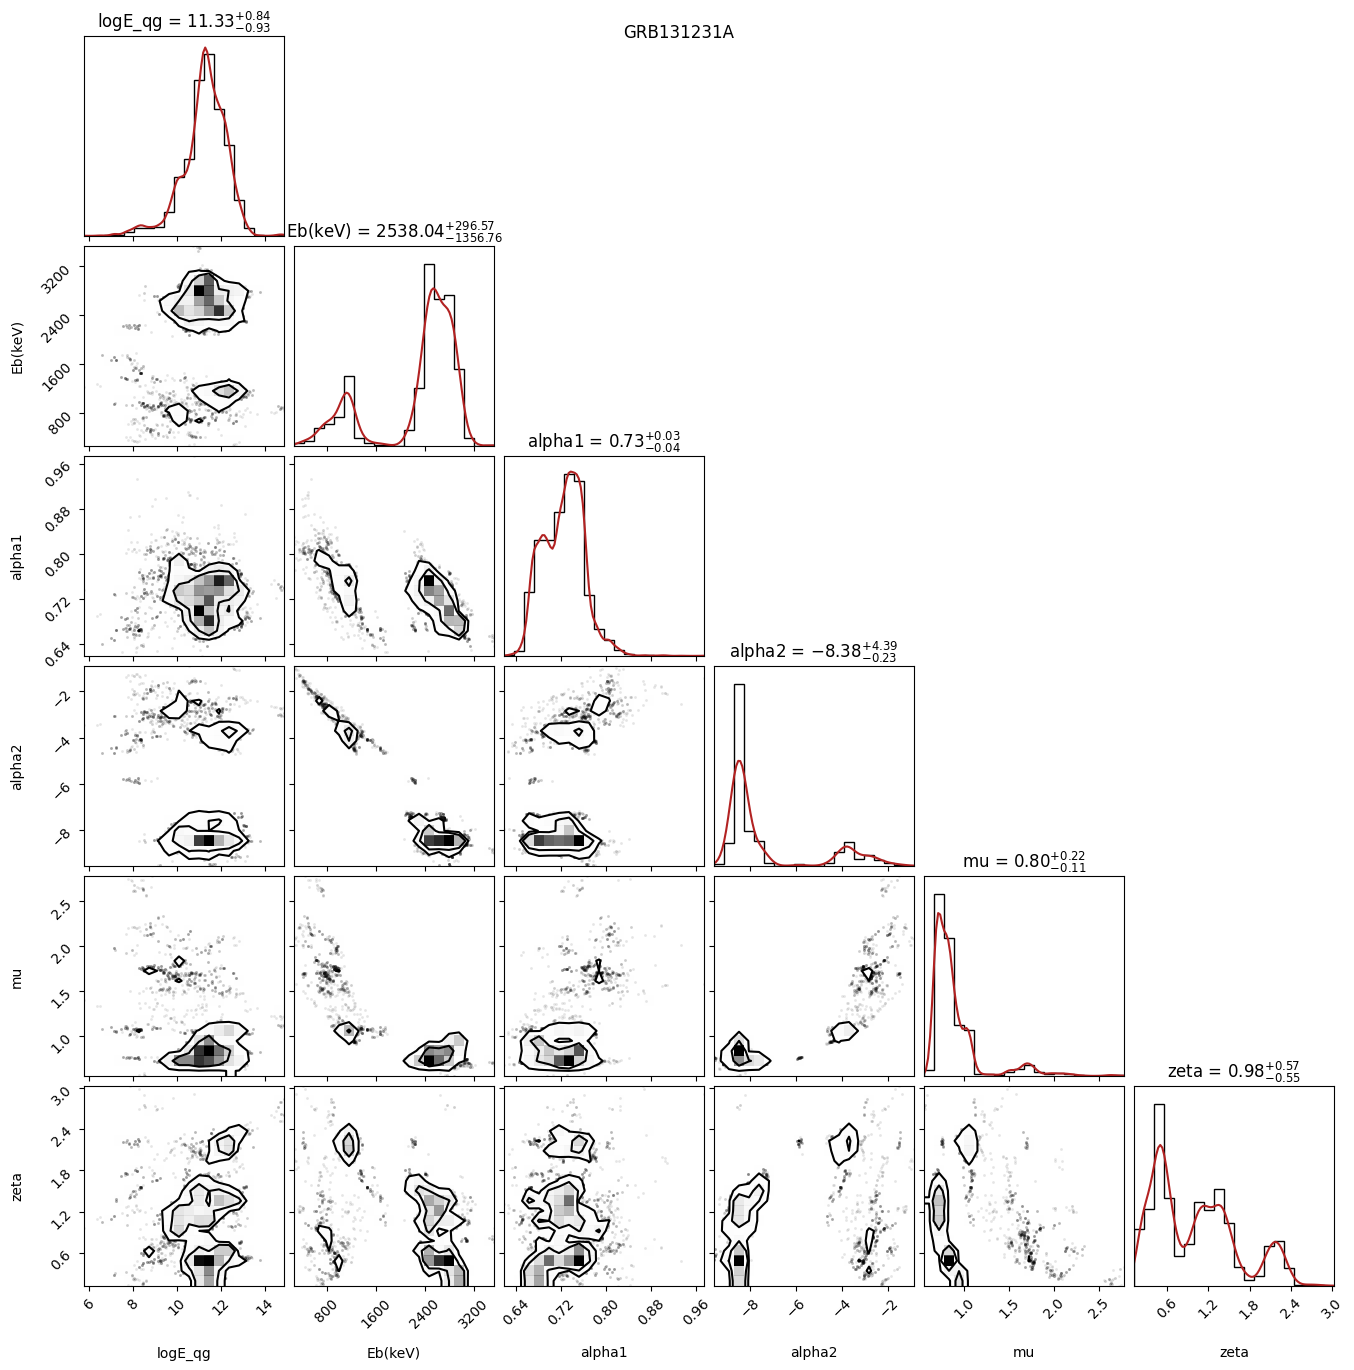

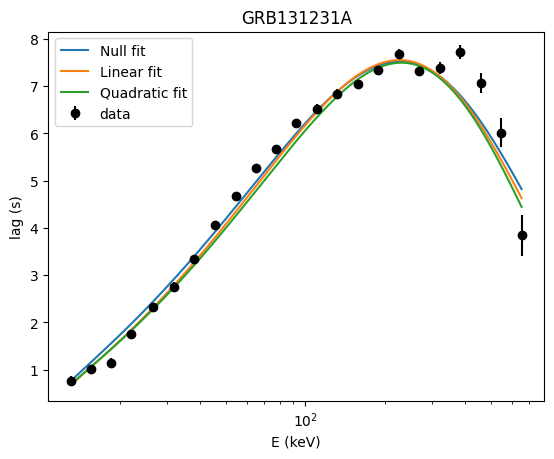

Bayes factor for null model:  -18.682697050897158 +/- 0.21055314063388358
Bayes factor for linear LIV model:  -20.65348820242093 +/- 0.21829257831548463
Bayes factor for quadratic LIV model:  -21.55669275760098 +/- 0.20268876927638824


675it [00:00, 1198.21it/s, bound: 0 | nc: 2 | ncall: 1840 | eff(%): 36.685 | loglstar:   -inf < -897.992 <    inf | logz: -906.247 +/-    nan | dlogz: 877.515 >  0.100]   /tmp/ipykernel_28363/3232513864.py:82: RuntimeWarning: overflow encountered in square
  err = np.sqrt((ddeltat_dE(x, Eb, alpha1, alpha2, mu, zeta) * E_err)**2 + yerr**2)
/tmp/ipykernel_28363/3232513864.py:34: RuntimeWarning: overflow encountered in power
  return zeta * (eob**alpha1) * ((0.5 * ((1 + eob)**(1/mu))) ** ((alpha2 - alpha1) * mu))
/tmp/ipykernel_28363/3232513864.py:61: RuntimeWarning: overflow encountered in power
  num = ((alpha1 * (mu**2 - 1) + alpha2)*(((E - E0)/Eb)**(1/mu)) + alpha1 * (mu**2))
/tmp/ipykernel_28363/3232513864.py:64: RuntimeWarning: invalid value encountered in multiply
  return nullhp(E, Eb, alpha1, alpha2, mu, zeta) * (num/(den1 * den2))
799it [00:00, 980.55it/s, bound: 0 | nc: 8 | ncall: 2321 | eff(%): 34.425 | loglstar:   -inf < -577.965 <    inf | logz: -586.459 +/-    nan | dlogz: 

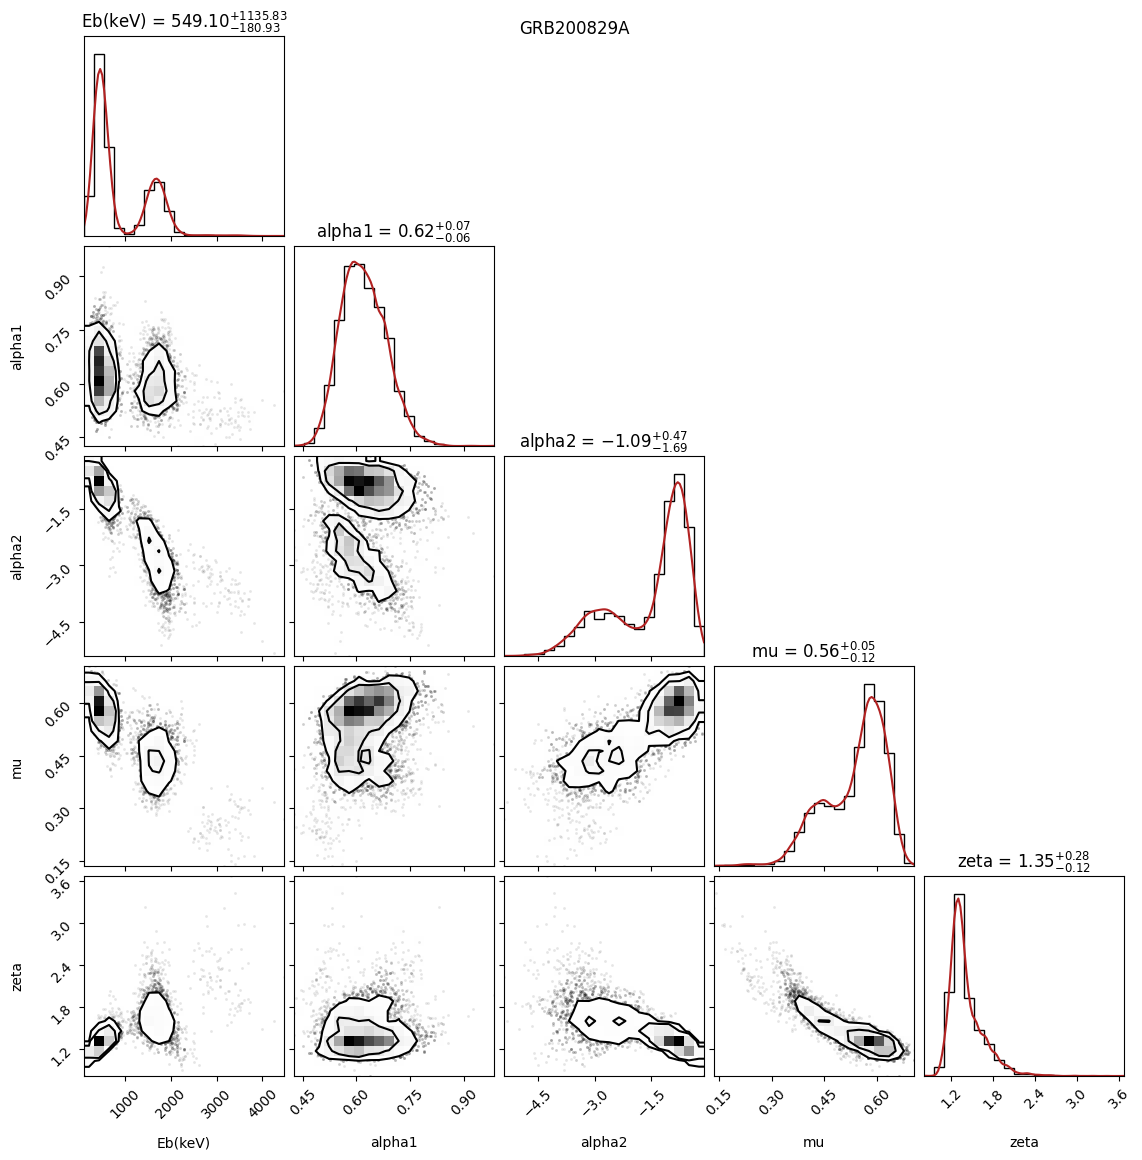

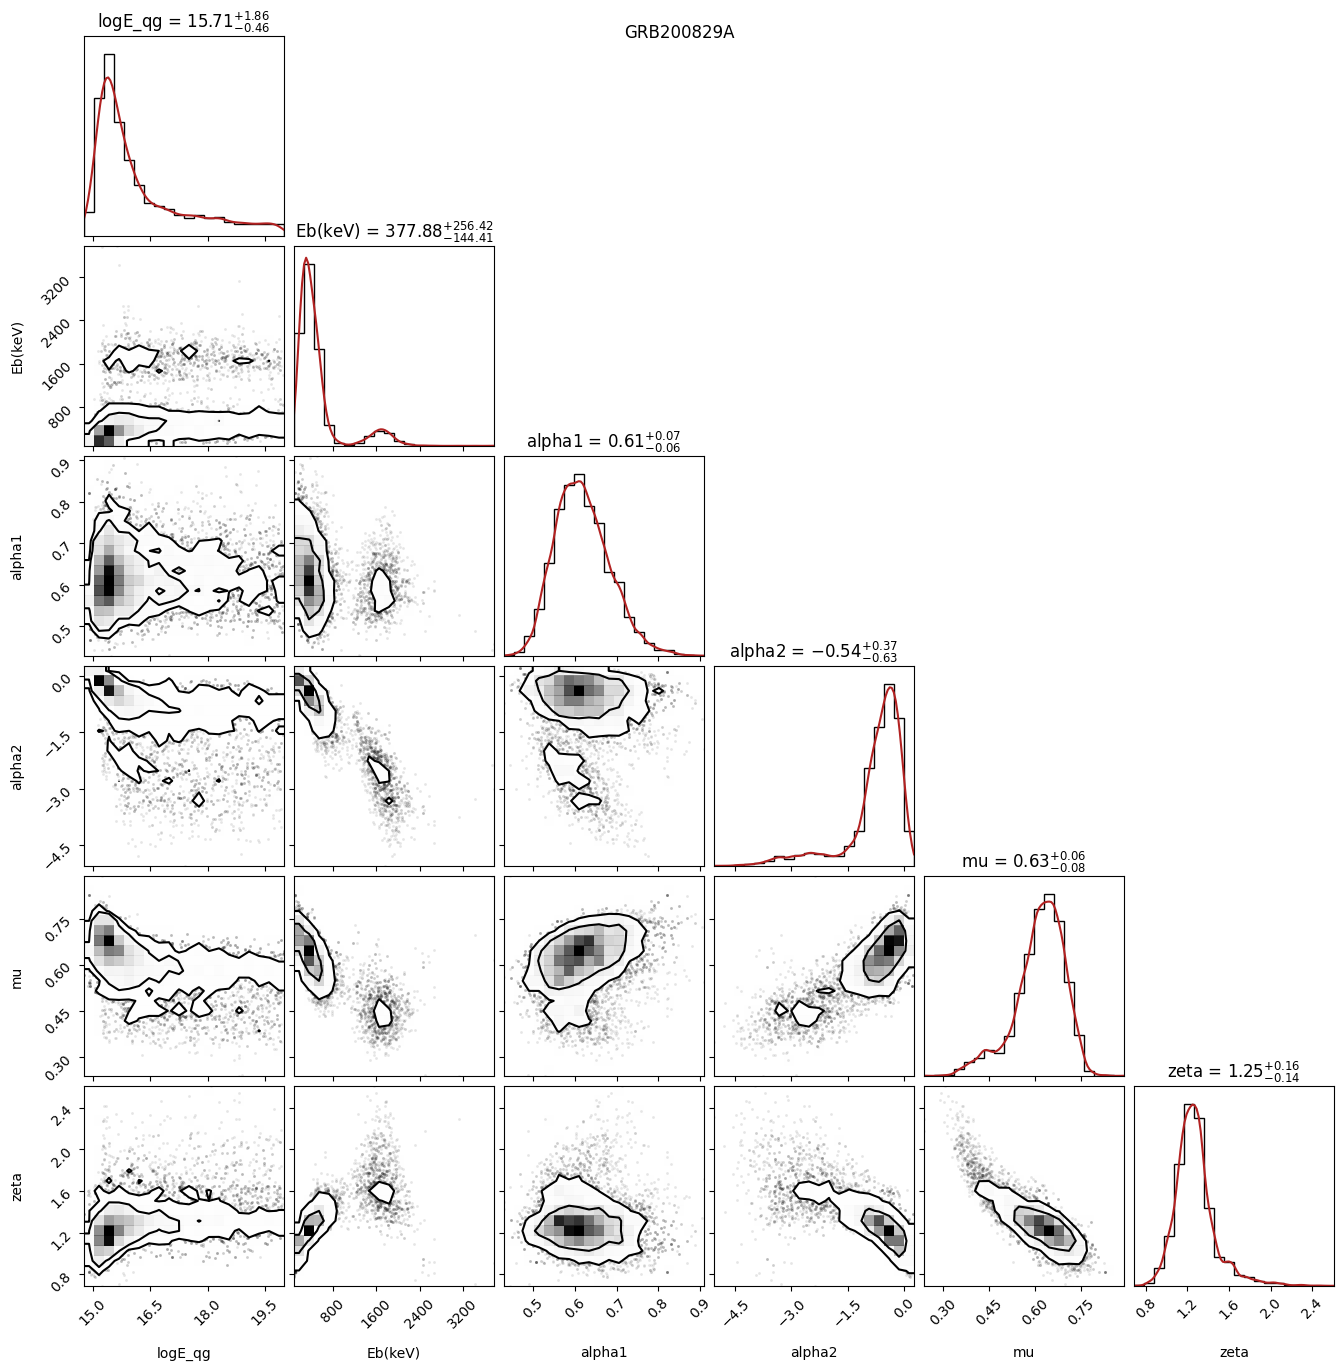

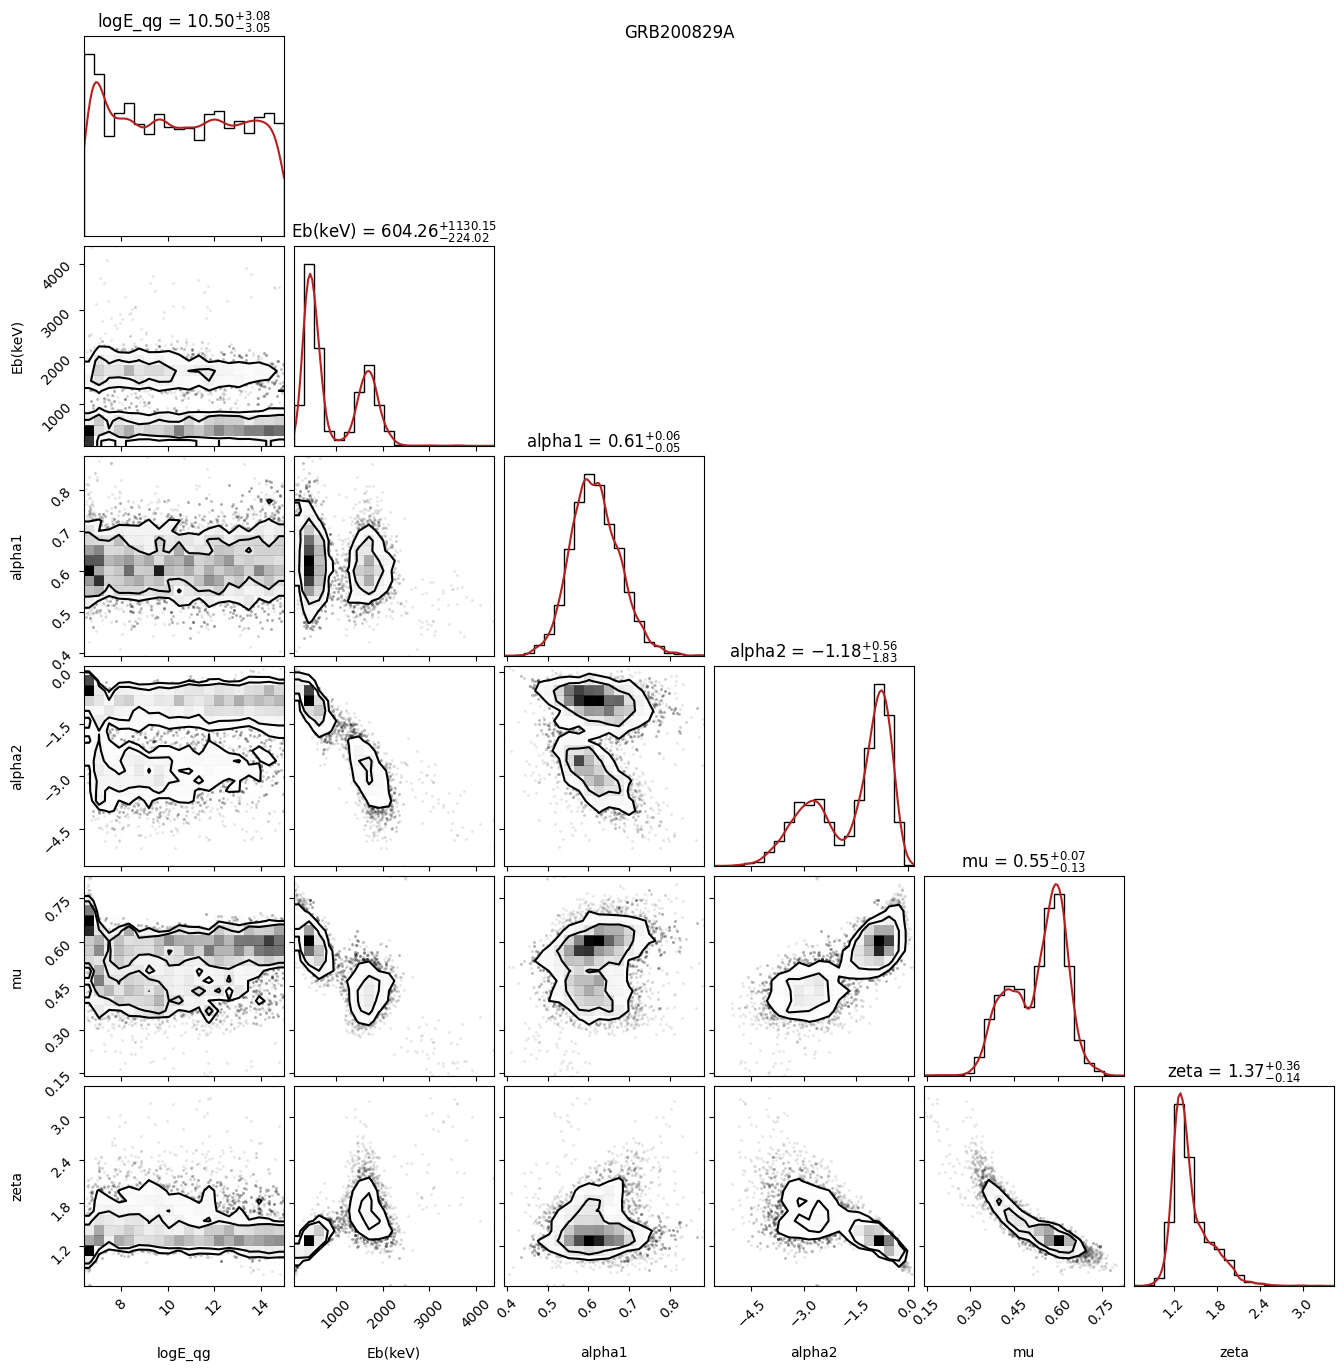

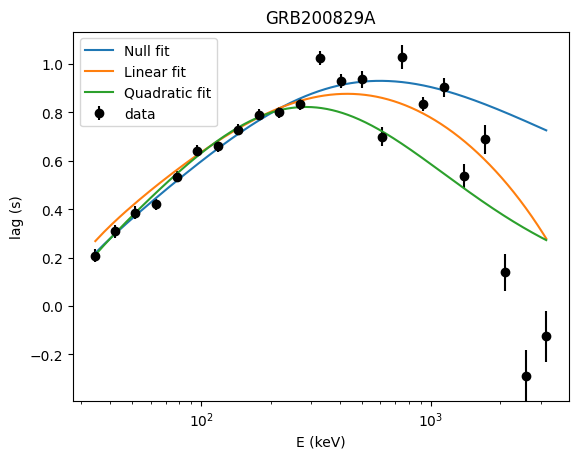

Bayes factor for null model:  4.913070328080127 +/- 0.21341652060902275
Bayes factor for linear LIV model:  4.43766976754076 +/- 0.2238586912644135
Bayes factor for quadratic LIV model:  4.056405956436188 +/- 0.21553081373619568


In [3]:
for grb in ['GRB131231A', 'GRB200829A']:
    
    grbname = grb + '.txt'
    grbname_wtht_ext = grbname.replace('.txt','')
    grbparam = pd.read_csv('../data/GRBPARAM.csv', index_col=0)

    arr = np.loadtxt('../data/asciidataof_fig1/32lag/'+grbname)
    data = [arr[:,0], arr[:,1], arr[:,2]]
    x = arr[:,0]
    y = arr[:,1]
    yerr = arr[:,2]
    df = pd.read_csv('../data/32lag_err/' + grb + '.txt', sep='\s+', header=None, names=['E_obs', 'E_obs_err', 'lag', 'lag_err'])
    E_err = df['E_obs_err'].values

    #Properties of GRB
    E0 = grbparam[grbname.replace('.txt','')].E0
    E0rest = E0
    Erest = arr[:,0]    #in keV
    z_com = grbparam[grbname.replace('.txt','')].redshift #redshift
    H0=67.36 #Hubble constant km -1 Mpc s -1
    omega_m = 0.315
    omega_l = 1 - omega_m

    lin_conv_fac = 3.0856 * 10**13
    quad_conv_fac = 3.0856 * 10**7
    
    #MODELS

    #NULL model
    def nullhp(E, Eb, alpha1, alpha2, mu, zeta):
        
        eob = (E - E0) / (Eb)
        
        return zeta * (eob**alpha1) * ((0.5 * ((1 + eob)**(1/mu))) ** ((alpha2 - alpha1) * mu))


    def int_z(z_prime, n):
        integ_fn = lambda z: (1+z)**n / np.sqrt(omega_m * (1+z)**3 + omega_l)
        return quad( integ_fn, a=0, b=z_prime)[0]

    int_z1 = np.asarray(int_z(z_com, 1))
    int_z2 = np.asarray(int_z(z_com, 2))

    #LINEAR model
    def linearhp(E, logEqg, Eb, alpha1, alpha2, mu, zeta):
        
        e0qg = (E - E0) / (10 ** logEqg)
        
        return (lin_conv_fac * e0qg * int_z1)/H0 + nullhp(E, Eb, alpha1, alpha2, mu, zeta)

    #QUADRATIC model
    def quadhp(E, logEqg, Eb, alpha1, alpha2, mu, zeta):
        e0qg = (E**2 - E0 **2) / ((10 ** logEqg)**2)
        
        return 1.5 * (quad_conv_fac * e0qg * int_z2)/H0 + nullhp(E, Eb, alpha1, alpha2, mu, zeta)


    #ERRORS
    
    def ddeltat_dE(E, Eb, alpha1, alpha2, mu, zeta):
        
        eob = (E - E0)/Eb
        fac = (alpha1 + ((alpha2 - alpha1)(eob**(1/mu)) / (1 + (eob**(1/mu)))))/(E - E0)
    
        return nullhp(E, Eb, alpha1, alpha2, mu, zeta) * fac
    
    
    # def ddeltat_dE(E, Eb, alpha1, alpha2, mu, zeta):
    #     num = ((alpha1 * (mu**2 - 1) + alpha2)*(((E - E0)/Eb)**(1/mu)) + alpha1 * (mu**2))
    #     den1 = ((mu**2)*(E - E0))
    #     den2 = ((E - E0)/Eb) + 1
    #     return nullhp(E, Eb, alpha1, alpha2, mu, zeta) * (num/(den1 * den2))
    
    def ddeltatdE_LIV_lin(E, logEqg, Eb, alpha1, alpha2, mu, zeta):
        de0qg = 1 / (10 ** logEqg)
        return (lin_conv_fac * de0qg * int_z1)/H0 + ddeltat_dE(E, Eb, alpha1, alpha2, mu, zeta)
    
    def ddeltatdE_LIV_quad(E, logEqg, Eb, alpha1, alpha2, mu, zeta):
        de0qg = 2 * E / ((10 ** logEqg)**2)
        return 1.5 * (quad_conv_fac * de0qg * int_z2)/H0 + ddeltat_dE(E, Eb, alpha1, alpha2, mu, zeta)
    
    
    
    #LOG-LIKELIHOODS
    def loglike_null(theta):
        Eb, alpha1, alpha2, mu, zeta = theta
        
        if alpha1 >= alpha2:
            model = nullhp(x,  Eb, alpha1, alpha2, mu, zeta)
            err = np.sqrt((ddeltat_dE(x, Eb, alpha1, alpha2, mu, zeta) * E_err)**2 + yerr**2)
            
            return sum(stats.norm.logpdf(*args) for args in zip(y,model,err))
        
        return -np.inf

    def loglike_linear(theta):
        logEqg, Eb, alpha1, alpha2, mu, zeta = theta
        
        if alpha1 >= alpha2:
            model = linearhp(x, logEqg, Eb, alpha1, alpha2, mu, zeta)
            err = np.sqrt((ddeltatdE_LIV_lin(x, logEqg, Eb, alpha1, alpha2, mu, zeta) * E_err)**2 + yerr**2)
            
            return sum(stats.norm.logpdf(*args) for args in zip(y,model,err))
        
        return -np.inf

    def loglike_quad(theta):
        logEqg, Eb, alpha1, alpha2, mu, zeta = theta
        
        if alpha1 >= alpha2:
            model = quadhp(x, logEqg, Eb, alpha1, alpha2, mu, zeta)
            err = np.sqrt((ddeltatdE_LIV_quad(x, logEqg, Eb, alpha1, alpha2, mu, zeta) * E_err)**2 + yerr**2)
            
            return sum(stats.norm.logpdf(*args) for args in zip(y,model,err))
        
        return -np.inf    


    #PRIORS
    Ebmax = 5000 #keV
    Ebmin = 0
    alpha1min = -3
    alpha1max = 10
    alpha2min = -10
    alpha2max = 3
    mumin = 0
    mumax = 3
    zetamin = 0
    zetamax = 4

    logeq1min = 0
    logeq1max = 20
    logeq2min = 0
    logeq2max = 15


    #PRIOR DISTRIBUTIONS

    def prior_transform_null(theta):
        Eb, alpha1, alpha2, mu, zeta = theta
        return [Ebmax * Eb + Ebmin, (alpha1max - alpha1min) * alpha1 + alpha1min, (alpha2max - alpha2min) * alpha2 + alpha2min, (mumax - mumin) * mu + mumin, (zetamax - zetamin) * zeta + zetamin]

    def prior_transform_linear(theta):
        logEqg, Eb, alpha1, alpha2, mu, zeta = theta
        return [(logeq1max - logeq1min) * logEqg + logeq1min, Ebmax * Eb + Ebmin, (alpha1max - alpha1min) * alpha1 + alpha1min, (alpha2max - alpha2min) * alpha2 + alpha2min, mumax * mu + mumin, zetamax * zeta + zetamin]

    def prior_transform_quadratic(theta):
        logEqg, Eb, alpha1, alpha2, mu, zeta = theta
        return [(logeq2max - logeq2min) * logEqg + logeq2min, Ebmax * Eb + Ebmin, (alpha1max - alpha1min) * alpha1 + alpha1min, (alpha2max - alpha2min) * alpha2 + alpha2min, mumax * mu + mumin, zetamax * zeta + zetamin]


    #SAMPLING
    nlive = 512

    with dyn.pool.Pool(ncpu, loglike_null, prior_transform_null) as pool0:
        sampler0 = dyn.NestedSampler(loglike_null, prior_transform_null, ndim=5, nlive = nlive, sample='rwalk', bound='multi', pool=pool0)
        sampler0.run_nested(dlogz=0.1)
        # sampler0.save(os.getcwd() + '/outputs/sampler_saves/' + grbname_wtht_ext + '_null_sampler.dill', store_samples=True)


    with dyn.pool.Pool(ncpu, loglike_linear, prior_transform_linear) as pool1:
        sampler1 = dyn.NestedSampler(loglike_linear, prior_transform_linear, ndim=6, nlive = nlive, sample='rwalk', bound='multi', pool=pool1)
        sampler1.run_nested(dlogz=0.1)


    with dyn.pool.Pool(ncpu, loglike_quad, prior_transform_quadratic) as pool2:
        sampler2 = dyn.NestedSampler(loglike_quad, prior_transform_quadratic, ndim=6, nlive = nlive, sample='rwalk', bound='multi', pool=pool2)
        sampler2.run_nested(dlogz=0.1)


    results0 = sampler0.results
    results1 = sampler1.results
    results2 = sampler2.results


    def smooth_plot(results, figname, labels=["logE_qg", "Eb(keV)", "alpha1", "alpha2", "mu", "zeta"]):
            weights = np.exp(results.logwt - results.logz[-1])
            samples = dyn.utils.resample_equal(  results.samples, weights)
            
            fig = corner(samples, weights=weights, labels=labels, levels=[0.68, 0.9], show_titles=True, title_kwargs={"fontsize": 12}, hist_kwargs={'density': True})
            ndim =samples.shape[1]
            for axidx, samps in zip([i*(ndim+1) for i in range(ndim)],samples.T):
                kde = gaussian_kde(samps)
                xvals = fig.axes[axidx].get_xlim()
                xvals = np.linspace(xvals[0], xvals[1], 100)
                fig.axes[axidx].plot(xvals, kde(xvals), color='firebrick')
                
            plt.suptitle(str(grb))
            plt.savefig('./outputs/contours_xerr/' + grb + '_' + figname + '_xerr.png')
            # plt.show()


    smooth_plot(results0, 'nullhp', labels=["Eb(keV)", "alpha1", "alpha2", "mu", "zeta"])


    smooth_plot(results1, 'linearhp', labels=["logE_qg", "Eb(keV)", "alpha1", "alpha2", "mu", "zeta"])


    smooth_plot(results2, 'quadhp', labels=["logE_qg", "Eb(keV)", "alpha1", "alpha2", "mu", "zeta"])


    results0.samples[np.argmax(results0.logl)]





    #PLOTTING FITS

    nplot = 1000
    E = np.linspace(min(Erest), max(Erest), nplot)
    samples0 = dyn.utils.resample_equal( results0.samples, np.exp(results0.logwt - results0.logz[-1]))
    # samples0 = np.median(samples0, axis=0)
    samples0 = samples0[np.argmax(results0.logl)]

    samples1 = dyn.utils.resample_equal( results1.samples, np.exp(results1.logwt - results1.logz[-1]))
    # samples1 = np.median(samples1, axis=0)
    samples1 = samples1[np.argmax(results1.logl)]

    samples2 = dyn.utils.resample_equal( results2.samples, np.exp(results2.logwt - results2.logz[-1]))
    # samples2 = np.median(samples2, axis=0)
    samples2 = samples2[np.argmax(results2.logl)]
    null_fit = [nullhp(E[i], samples0[0], samples0[1], samples0[2], samples0[3], samples0[4]) for i in range(nplot)]
    liv_lin_fit = [linearhp(E[i], samples1[0], samples1[1], samples1[2], samples1[3], samples1[4], samples1[5]) for i in range(nplot)]
    liv_quad_fit = [quadhp(E[i], samples2[0], samples2[1], samples2[2], samples2[3], samples2[4], samples2[5]) for i in range(nplot)]

    plt.figure()
    plt.errorbar(Erest, y, yerr, fmt='o', color='black', label='data')
    plt.plot(E, null_fit, label='Null fit')
    plt.plot(E, liv_lin_fit,label='Linear fit')
    plt.plot(E, liv_quad_fit, label='Quadratic fit')
    plt.xscale('log')
    # plt.yscale('log')
    plt.ylim(min(y) - max(abs(yerr)), max(y) + max(abs(yerr)))
    # plt.ylim(-200, 20)
    plt.legend()
    plt.xlabel('E (keV)')
    plt.ylabel('lag (s)')
    plt.title(grbname_wtht_ext)
    plt.savefig('./outputs/fits_xerr/' + grbname_wtht_ext + '_fit_logE_xerr.png', facecolor='white')
    plt.show()



    print('Bayes factor for null model: ', results0.logz[-1], '+/-', results0.logzerr[-1])
    print('Bayes factor for linear LIV model: ', results1.logz[-1], '+/-', results1.logzerr[-1])
    print('Bayes factor for quadratic LIV model: ', results2.logz[-1], '+/-', results2.logzerr[-1])

    with open('./outputs/BF_xerr/' + grb + '_results.txt', 'w') as f:
        f.write(str(results0.logz[-1]) + ',' + str(results0.logzerr[-1]) + '\n')
        f.write(str(results1.logz[-1]) + ',' + str(results1.logzerr[-1]) + '\n')
        f.write(str(results2.logz[-1]) + ',' + str(results2.logzerr[-1]) + '\n')
        
    f.close()
    f = []


    dyn.utils.save_sampler(sampler0, './outputs/sampler_saves_xerr/' + grb + '_null_sampler.pkl')
    dyn.utils.save_sampler(sampler1, './outputs/sampler_saves_xerr/' + grb + '_linear_sampler.pkl')
    dyn.utils.save_sampler(sampler2, './outputs/sampler_saves_xerr/' + grb + '_quadratic_sampler.pkl')
    
    
    
    def chi2_gof(x, y, yerr, n, *fit_func_args):
        if n == 0:
            err = np.sqrt((ddeltat_dE(x, *fit_func_args) * E_err)**2 + yerr**2)
            fit_func = nullhp
            return np.sum(((y - fit_func(x, *fit_func_args))/err)**2)/(len(y) - len(fit_func_args))
        
        elif n == 1:
            err = np.sqrt((ddeltatdE_LIV_lin(x, *fit_func_args) * E_err)**2 + yerr**2)
            fit_func = linearhp
            return np.sum(((y - fit_func(x, *fit_func_args))/err)**2)/(len(y) - len(fit_func_args))
        
        elif n == 2:
            err = np.sqrt((ddeltatdE_LIV_quad(x, *fit_func_args) * E_err)**2 + yerr**2)
            fit_func = quadhp
            return np.sum(((y - fit_func(x, *fit_func_args))/err)**2)/(len(y) - len(fit_func_args))


    gof_null = chi2_gof(Erest, y, yerr, nullhp, samples0[0], samples0[1], samples0[2], samples0[3], samples0[4])
    gof_lin = chi2_gof(Erest, y, yerr, linearhp, samples1[0], samples1[1], samples1[2], samples1[3], samples1[4], samples1[5])
    gof_quad = chi2_gof(Erest, y, yerr, quadhp, samples2[0], samples2[1], samples2[2], samples2[3], samples2[4], samples2[5])


    with open('./outputs/GOF_xerr/' + grb + '_GOF.txt', 'w') as f:
        f.write(str(gof_null) + '\n')
        f.write(str(gof_lin) + '\n')
        f.write(str(gof_quad) + '\n')
        
    f.close()
    f = []
    
    
    threesamplers = ['_null_sampler.pkl', '_linear_sampler.pkl', '_quadratic_sampler.pkl']
    sampler0 = dyn.utils.restore_sampler('./outputs/sampler_saves_xerr/' + grb + threesamplers[0])
    sampler1 = dyn.utils.restore_sampler('./outputs/sampler_saves_xerr/' + grb + threesamplers[1])
    sampler2 = dyn.utils.restore_sampler('./outputs/sampler_saves_xerr/' + grb + threesamplers[2])
    results0 = sampler0.results
    results1 = sampler1.results
    results2 = sampler2.results


  


    #PLOTTING FITS

    nplot = 1000
    E = np.linspace(min(Erest), max(Erest), nplot)
    samples0 = dyn.utils.resample_equal( results0.samples, np.exp(results0.logwt - results0.logz[-1]))
    # samples0 = np.median(samples0, axis=0)
    samples0 = samples0[np.argmax(results0.logl)]

    samples1 = dyn.utils.resample_equal( results1.samples, np.exp(results1.logwt - results1.logz[-1]))
    # samples1 = np.median(samples1, axis=0)
    samples1 = samples1[np.argmax(results1.logl)]

    samples2 = dyn.utils.resample_equal( results2.samples, np.exp(results2.logwt - results2.logz[-1]))
    # samples2 = np.median(samples2, axis=0)
    samples2 = samples2[np.argmax(results2.logl)]
    null_fit = np.round([nullhp(E[i], samples0[0], samples0[1], samples0[2], samples0[3], samples0[4]) for i in range(nplot)], 10)
    liv_lin_fit = np.round([linearhp(E[i], samples1[0], samples1[1], samples1[2], samples1[3], samples1[4], samples1[5]) for i in range(nplot)], 10)
    liv_quad_fit = np.round([quadhp(E[i], samples2[0], samples2[1], samples2[2], samples2[3], samples2[4], samples2[5]) for i in range(nplot)], 10)
